# Introduction to Scikit-Learn (sklearn)

0. An end-to-end Sciki-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm/model for our problem
3. Fit the model/algo and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Put it all together

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# X is the "features matrix", y is the target
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [3]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# make a prediction - ERRORs Shape of the data to predict must match training data
# y_label = clf.predict(np.array([0, 2, 3, 4]))

In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2


In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [10]:
y_test

227    0
73     1
222    0
266    0
85     1
      ..
66     1
164    1
28     1
89     1
51     1
Name: target, Length: 61, dtype: int64

In [11]:
# Evaluate the model
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.9016393442622951

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[25,  3],
       [ 3, 30]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.9016393442622951

In [16]:
# Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 101, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 88.52%

Trying model with 20 estimators...
Model accuracy on test set: 90.16%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 88.52%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 90.16%

Trying model with 100 estimators...
Model accuracy on test set: 91.80%



In [17]:
# Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [18]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.9180327868852459

## Getting data ready to be used with ML

Three main things we have to do:
1. Split the data into features and labels (usually 'X' and 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Make sure all numbers

In [24]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
X = car_sales.drop('Price', axis=1) # Note axis defaults to 0 (row)
y = car_sales['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
# Can't train a model to with strings - all must be numbers
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [29]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.3235867221569877

### Dealing with missing data
1. Fill them with some value (imputation)
2. Remove the samples with missing data altogether

In [34]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [37]:
car_sales_missing['Doors'].median()

4.0

In [38]:
# Fill the columns
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(car_sales_missing['Odometer (KM)'].median(), inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing Price, since we can't make any predictions with missing labels
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [42]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [47]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [48]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [50]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## Choosing the right estimator/algorithm for your problem

Things to note:

* Sklearn refers to machine learning models/algorithms as *estimators*
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problems - predicting a number (selling price of a car)

Sklearn choosing a model flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [51]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [52]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [53]:
housing_df['MedHouseVal'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [54]:
from sklearn.linear_model import Ridge

np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal'] # median house price in $100,000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
# This produces a "coefficient of determination", which is the R^2 value - how well the features predict the target
model.score(X_test, y_test)

0.5758549611440126

In [55]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2841671821008396

In [56]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.41655189098028245

In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8061475633020818

## Classification example

In [59]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
X = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

from sklearn.svm import LinearSVC

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearSVC()
model.fit(X_train, y_train)
# This produces a "coefficient of determination", which is the R^2 value - how well the features predict the target
model.score(X_test, y_test)

C:\Coding\Data Science\ztm-machine-learning\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [62]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

In [63]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [68]:
# Get the probabilities associated with each prediction.
# e.g. below, first one prediction of 0 is 89% confident, second one is prediction of 1 is just 51% sure 

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

In [69]:
model.predict(X_test)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [70]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
X = housing_df.drop(['MedHouseVal'], axis=1)
y = housing_df['MedHouseVal']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
# This produces a "coefficient of determination", which is the R^2 value - how well the features predict the target
model.score(X_test, y_test)

0.8059837014172988

In [78]:
y_preds = model.predict(X_test)
y_preds

array([0.49909  , 0.74815  , 4.9334564, ..., 4.8351584, 0.71778  ,
       1.65602  ])

In [79]:
from sklearn.metrics import mean_absolute_error

# mean absolute error is the average difference between the test and prediction data points
# in this case, since we are looking at targets as hundreds of thousands of dollars, mean absolute error is $32,672
mean_absolute_error(y_test, y_preds)

0.32672061405038777

### 3 ways to evaluate a machine learning model
1. Estimator's built in `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

In [81]:
from sklearn.model_selection import cross_val_score

X = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# This produces a "coefficient of determination", which is the R^2 value - how well the features predict the target
model.score(X_test, y_test)

0.8524590163934426

In [86]:
# cross validation takes X different random slices of 80/20 train/test split
# then evaluate the model X different times
# This avoids "lucky splits"
cv_scores = cross_val_score(model, X, y, cv=10)
cv_scores

array([0.87096774, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.86666667, 0.73333333, 0.8       , 0.73333333, 0.8       ])

In [90]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {cv_scores.mean()*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.47%


In [91]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

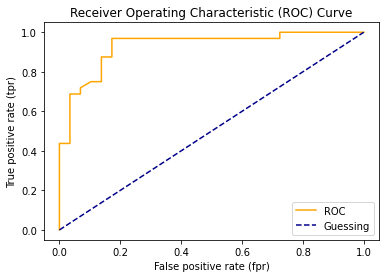

In [92]:
# Create function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

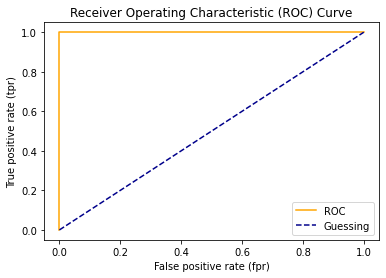

In [94]:
# Plot perfect ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [95]:
roc_auc_score(y_test, y_test)

1.0

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [98]:
pd.crosstab(y_test, y_preds, rownames=['Actual Lables'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Lables,,
0,24,5
1,4,28


<AxesSubplot:>

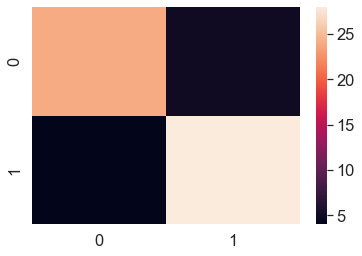

In [100]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

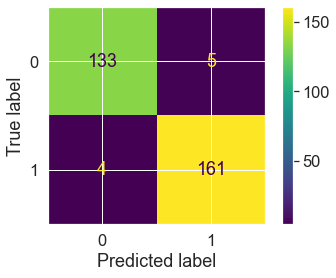

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)

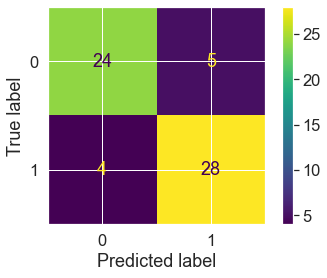

In [102]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [105]:
# Where precision and recall become valuable over just accuracy

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

print(classification_report(disease_true, disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Coding\Data Science\ztm-machine-learning\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Coding\Data Science\ztm-machine-learning\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Coding\Data Science\ztm-machine-learning\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [106]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal'] # median house price in $100,000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
model.score(X_test, y_test)

0.8059837014172988

In [108]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [109]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [110]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [112]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32672061405038777

In [113]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.499090,0.022090
3024,0.45800,0.748150,0.290150
15663,5.00001,4.933456,-0.066554
20484,2.18600,2.569780,0.383780
9814,2.78000,2.346900,-0.433100
13311,1.58700,1.672960,0.085960
7113,1.98200,2.301510,0.319510
7668,1.57500,1.667750,0.092750
18246,3.40000,2.526490,-0.873510
5723,4.46600,4.860098,0.394098


In [114]:
np.abs(df['differences']).mean()

0.3267206140503876

In [117]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2542406995878388

In [119]:
df['squared differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [120]:
df['squared differences'].mean()

0.2542406995878385

In [132]:
df_large_error = df.copy()
df_large_error.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [133]:
df_large_error['squared differences'].mean()

0.2542406995878385

In [136]:
X = heart_disease.drop('target', axis=1)
y= heart_disease['target']

np.random.seed(42)

model = RandomForestClassifier()

cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.3f}%)")

The cross-validated accuracy is 82.481%)


In [139]:
np.random.seed(42)

cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [140]:
print(f"The cross-validated precision is {np.mean(cv_precision)})")

The cross-validated precision is 0.8329547346025924)


In [141]:
np.random.seed(42)
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [142]:
print(f"The cross-validated accuracy is {np.mean(cv_recall)})")

The cross-validated accuracy is 0.8545454545454545)


In [143]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal'] # median house price in $100,000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring='r2')
np.mean(cv_r2)

0.653726846238643

In [147]:
cv_r2

array([0.6202544 , 0.72010179, 0.62082435])

In [149]:
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mae)

-0.46290320030610327

In [150]:
cv_mae

array([-0.50541276, -0.33525519, -0.54804166])

In [151]:
cv_mse = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mse)

-0.4812116900339148

In [152]:
cv_mse

array([-0.51916109, -0.42201092, -0.50246307])

## Improving a model

First predictions = baseline predictions
First model = baseline model

In [153]:
model = RandomForestClassifier()
model.get_params() # Get hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning by hand

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [168]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [169]:
np.random.seed(42)

# Shuffle
heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [174]:
# baseline classifier without tuning
model = RandomForestClassifier() 
model.fit(X_train, y_train)
y_preds = model.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [173]:
np.random.seed(42)
model2 = RandomForestClassifier(max_depth=10)
model2.fit(X_train, y_train)
y_preds2 = model2.predict(X_valid)
baseline_metrics2 = evaluate_preds(y_valid, y_preds2)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


### Hyperparameter tuning with RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ['auto', 'sqrt'],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_jobs=1)

# Setup search CV
rs_model = RandomizedSearchCV(estimator=model, param_distributions=grid,
                             n_iter=10, # number of models to try
                             cv=5,
                             verbose=2)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [177]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [178]:
# Make predictions using the best hyperparameters
rs_y_preds = rs_model.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### Hyperparameter tuning with GridSearchCV

In [179]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
6*5*2*3*3*5 # grid search brute forces ALL combinations

2700

In [183]:
grid_2 = {"n_estimators": [100, 200, 500],
       "max_depth": [None],
       "max_features": ['auto', 'sqrt'],
       "min_samples_split": [6],
       "min_samples_leaf": [1,2]}

In [185]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

gs_model = GridSearchCV(estimator=model, param_grid=grid_2,
                             cv=5,
                             verbose=2)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [186]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [187]:
gs_y_preds = gs_model.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [189]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics, 
                            'random search': rs_metrics,
                              'grid search': gs_metrics})

compare_metrics

,baseline,random search,grid search
accuracy,0.82,0.82,0.82
precision,0.81,0.77,0.77
recall,0.88,0.86,0.86
f1,0.85,0.81,0.81


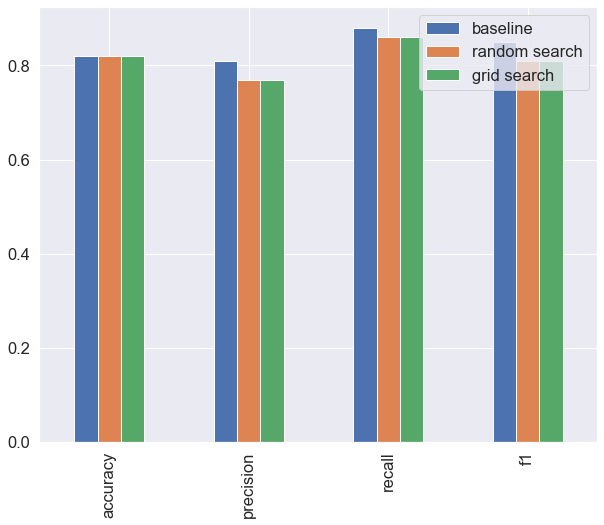

In [191]:
compare_metrics.plot.bar(figsize=(10, 8));

## Saving and loading trained machine learning models

In [192]:
import pickle

pickle.dump(gs_model, open('gs_random_forest_model_1.pkl', 'wb'))

In [193]:
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [194]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [195]:
from joblib import dump, load

dump(gs_model, filename='gs_random_forest_model.joblib')

['gs_random_forest_model.joblib']

In [196]:
loaded_joblib_model = load(filename='gs_random_forest_model.joblib')

In [197]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}